# Exploring craft beers and breweries in U.S.

__Industry__: 

Food and Beverages

__Datasets__: 

beers.csv - Contains data on 2000+ craft canned beers from 2017

breweries.csv - Contains data for 500+ breweries in the United States from 2017


Source: https://www.kaggle.com/nickhould/craft-cans

# Visualizing the data sets



In [1]:
import pandas as pd

# Beers

In [2]:
# Create Beers Data Frame
beers_df = pd.read_csv('../data/external/beers.csv'
                       ,usecols=['abv','ibu','id', 'name', 'style', 'brewery_id', 'ounces'])

In [3]:
beers_df.head(5)

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [4]:
list(beers_df)

['abv', 'ibu', 'id', 'name', 'style', 'brewery_id', 'ounces']

In [5]:
# Drop the column not needed
beers_df = beers_df.drop(['ounces'], axis=1)

In [6]:
list(beers_df)

['abv', 'ibu', 'id', 'name', 'style', 'brewery_id']

In [7]:
beers_df.head(5)

,abv,ibu,id,name,style,brewery_id
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177
4,0.075,NaN,2262,Sex and Candy,American IPA,177


In [8]:
beers_df.to_csv('../data/interim/beers.csv')

# Breweries

In [9]:
# Create Breweries Data Frame
breweries_df = pd.read_csv('../data/external/breweries.csv')

In [10]:
list(breweries_df)

['Unnamed: 0', 'name', 'city', 'state']

In [11]:
# Change the name of 'Unnamed: 0' to 'brewery_id' to use in merge with beers_df
breweries_df.rename(columns={'Unnamed: 0': 'brewery_id'}, inplace=True)

In [12]:
breweries_df.head(5)

,brewery_id,name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA


In [13]:
breweries_df.to_csv('../data/interim/breweries.csv')

# Merging the data sets

In [14]:
# Merge the data sets on the common column-brewery_id
result = pd.merge(beers_df, breweries_df, on='brewery_id')

In [15]:
# Rename the merged columns
result = result.rename(index=str, columns={"name_x":"beer_name", "name_y":"brewery_name"})

In [16]:
# Save the copy of merged data frame
result.to_csv('../data/processed/results.csv')

In [17]:
result.head(5)

,abv,ibu,id,beer_name,style,brewery_id,brewery_name,city,state
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,10 Barrel Brewing Company,Bend,OR
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,18th Street Brewery,Gary,IN
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,18th Street Brewery,Gary,IN


# Plots

In [18]:
# Use Matplotlib for plotting the outcomes
import matplotlib.pyplot as plt

### Which states have the highest number of breweries?

Text(0,0.5,'Number of breweries')

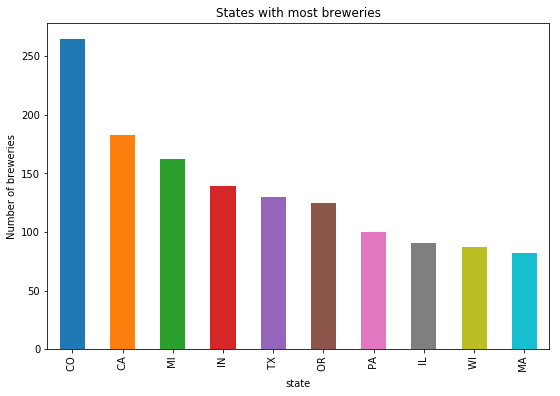

In [19]:
plt.figure(figsize=(9,6))

plot=result.groupby('state')['brewery_name'].count().nlargest(10).plot(kind='bar',title='States with most breweries')

plot.set_ylabel('Number of breweries')

### Which cities have the highest number of breweries?

Text(0,0.5,'Number of breweries')

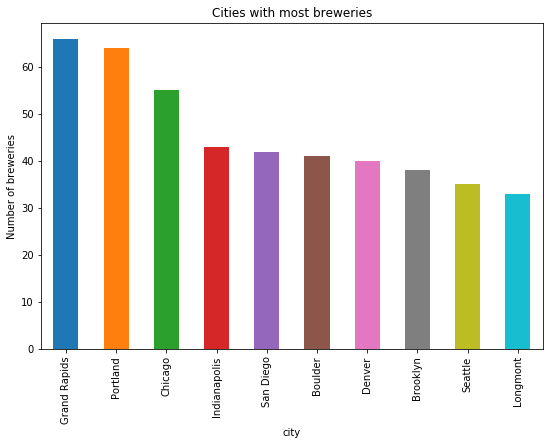

In [20]:
plt.figure(figsize=(9,6))

plot1=result.groupby('city')['brewery_name'].count().nlargest(10).plot(kind='bar',title='Cities with most breweries')

plot1.set_ylabel('Number of breweries')

### Which are the most common brewed beer styles?

Text(0,0.5,'Number of Different Beers')

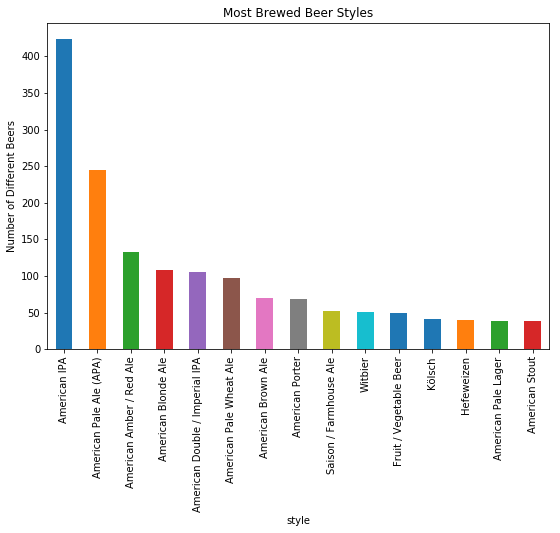

In [21]:
plt.figure(figsize=(9,6))
plot2 = result.groupby('style')['beer_name'].count().nlargest(15).plot(kind='bar', \
               title='Most Brewed Beer Styles', )

plot2.set_ylabel('Number of Different Beers')

# Takeaways

#### 1. Colorado has by far the most breweries in the US.

#### 2. Grand Rapids (MI), Portland (OR), and Chicago (IL) are the best places to visit if you are looking to tour a lot of breweries in one city.

#### 3. American IPAs are the most commonly brewed beer at Craft Breweries.